# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar

### First ML Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix


%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features, identify_missing_data, feature_importance_plot
from src.learning_curve_plot import learning_curve_plot

In [2]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

array([[<AxesSubplot:title={'center':'track_popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

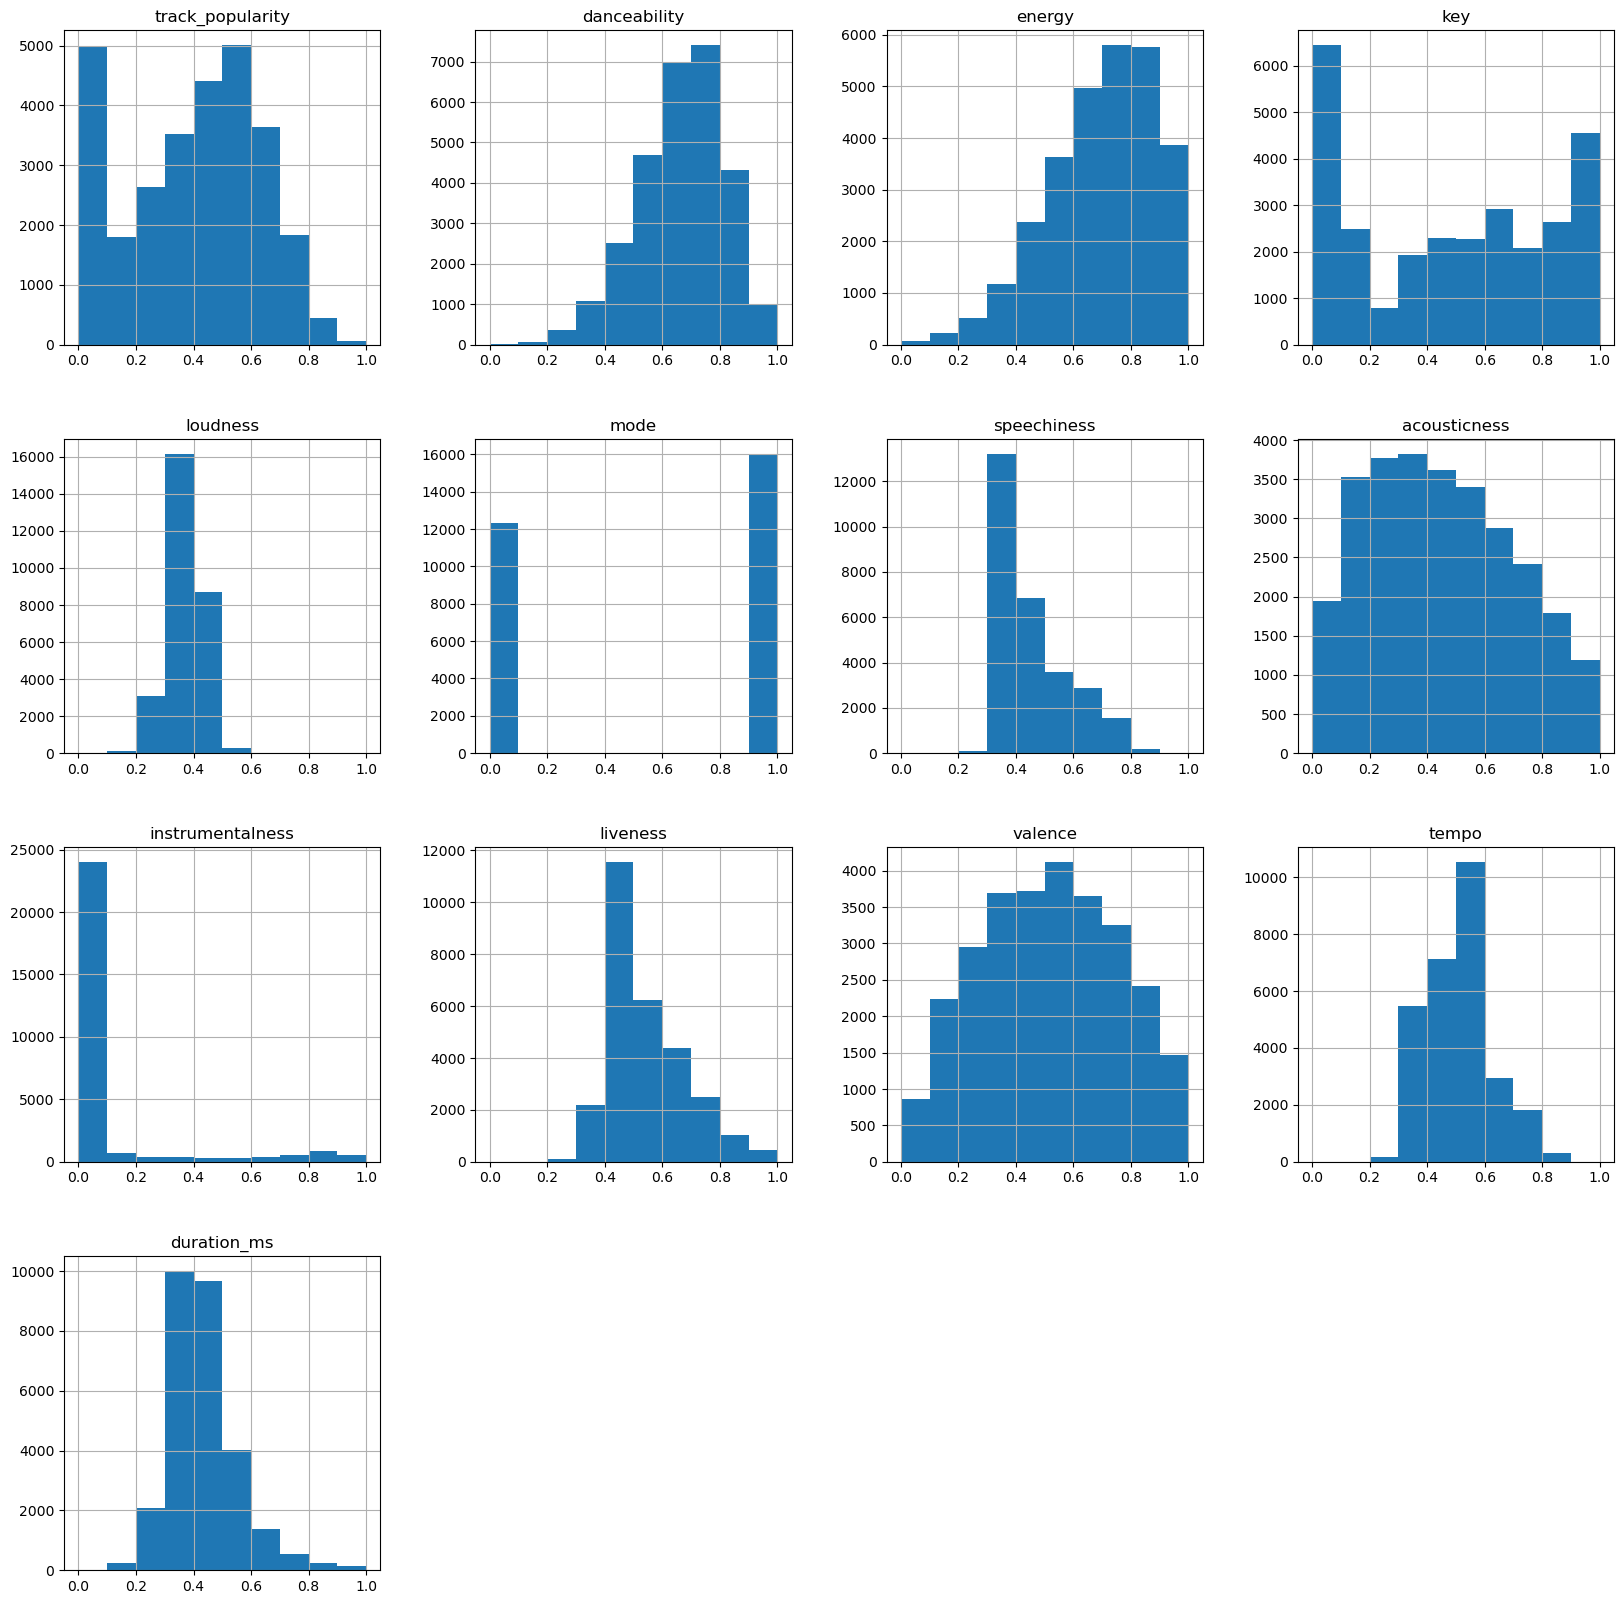

In [27]:
# Histograms of numerical variables

plt.rcParams["figure.figsize"] = (20,20)

songs_data.drop(["genre"], axis=1).hist()

In [3]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [4]:
X_train, X_test, y_train_dt, y_test_dt = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [5]:
clf_tree = DecisionTreeClassifier()
clf_tree

DecisionTreeClassifier()

In [6]:
clf_tree.fit(X_train, y_train_dt)

DecisionTreeClassifier()

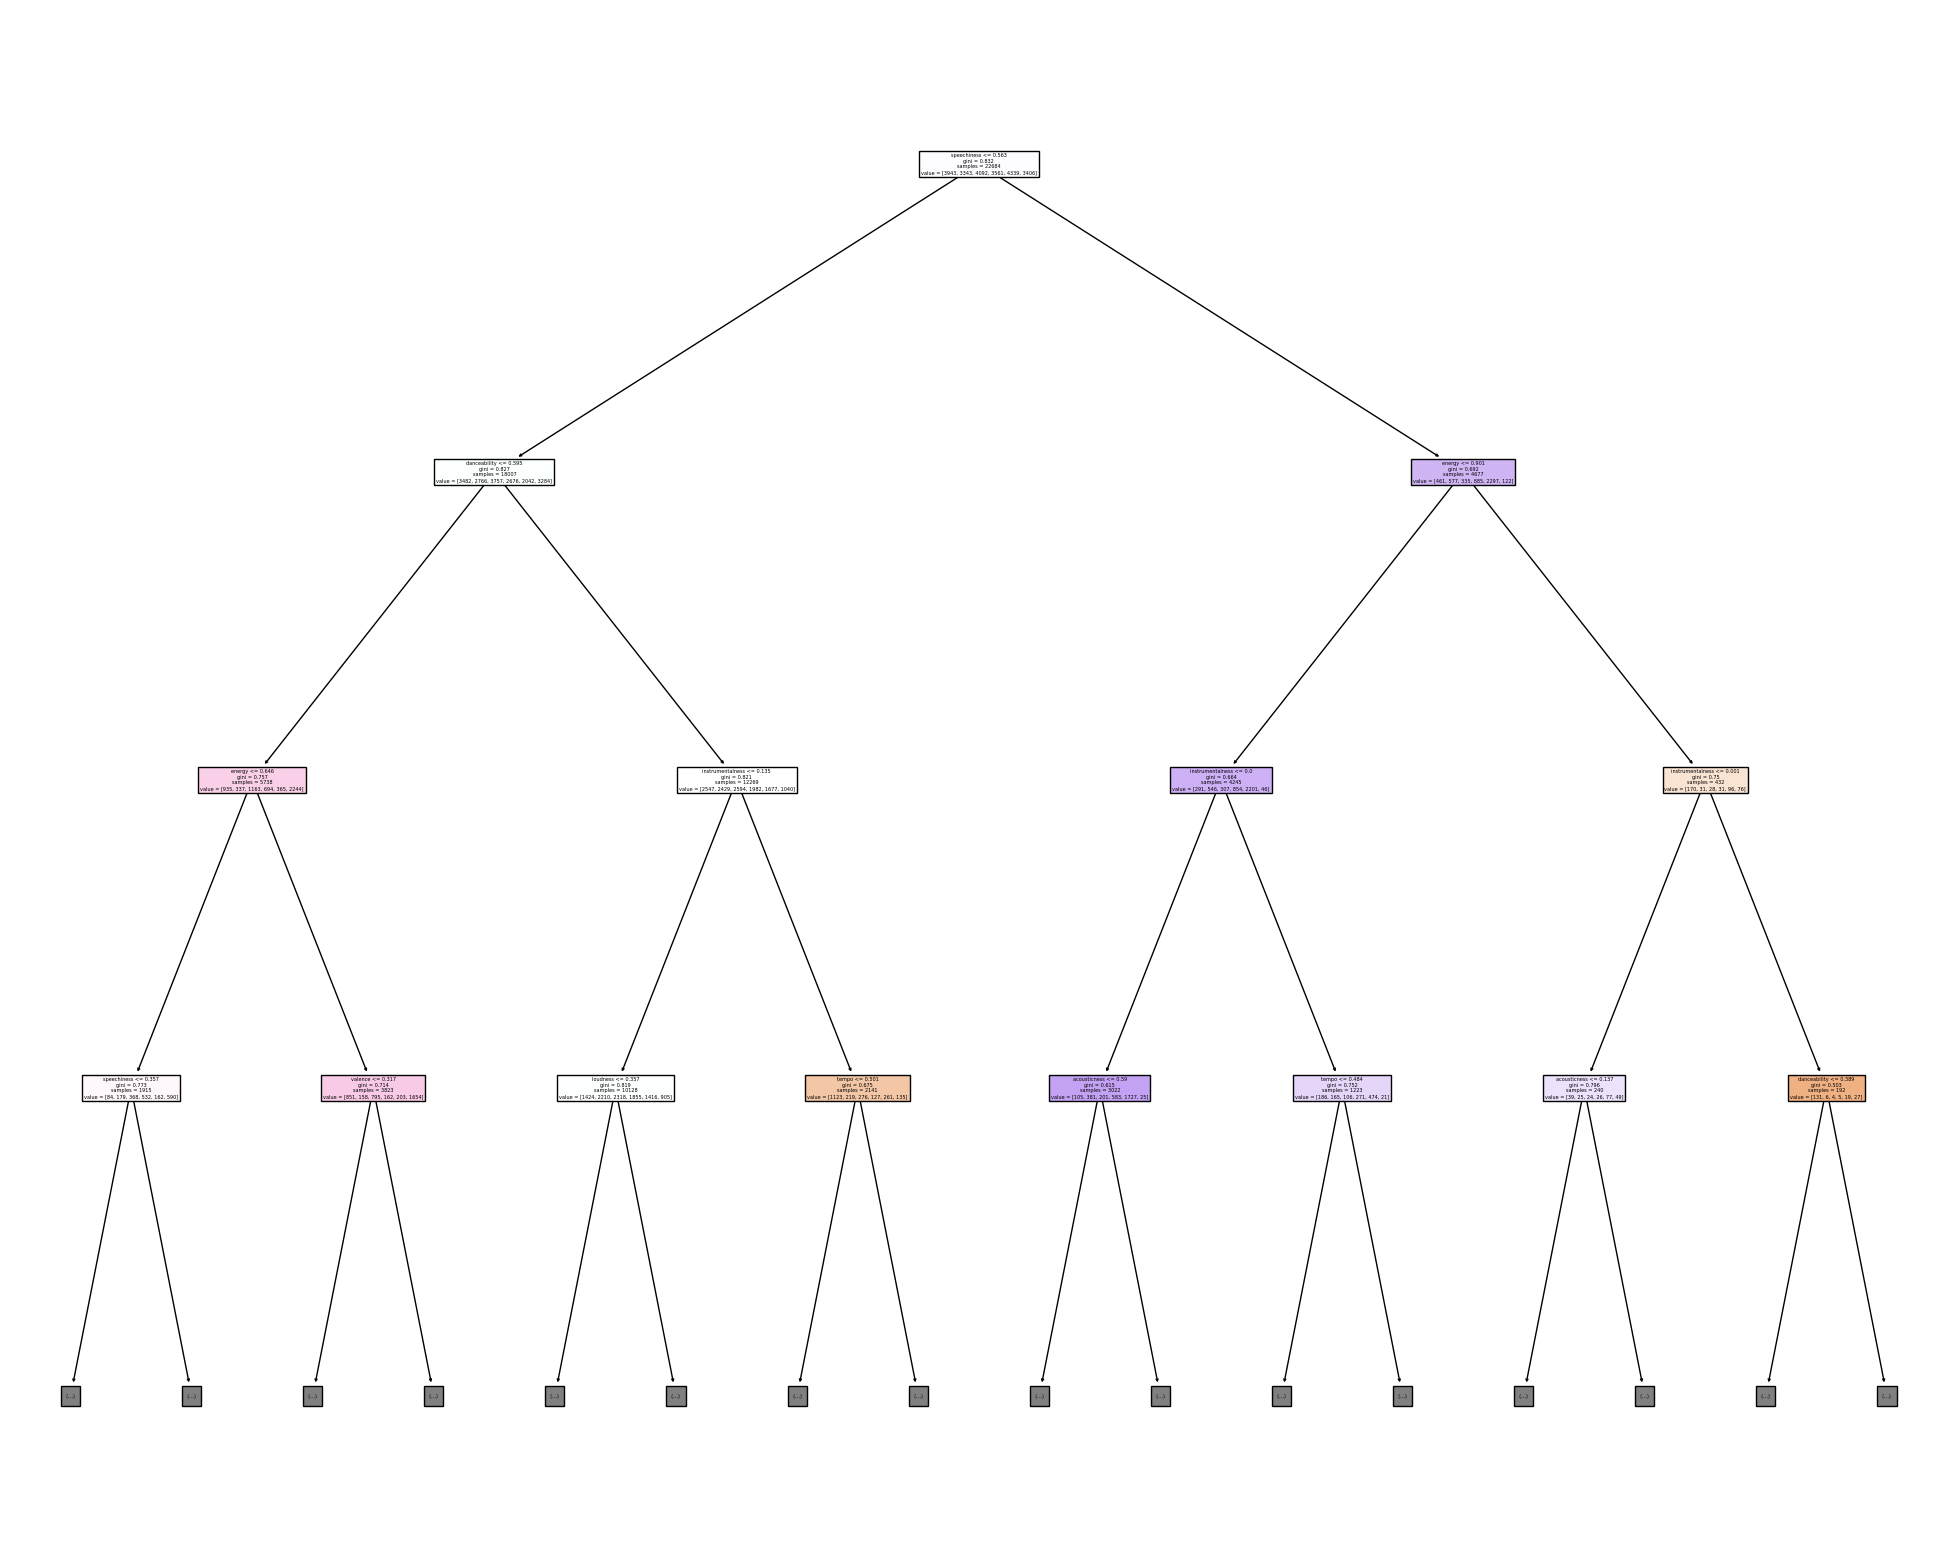

In [7]:
from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   max_depth = 3,
                   filled = True)

In [8]:
y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([4, 5, 4, ..., 4, 4, 2])

In [9]:
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test_dt[0:5]))

first five predicted values: [4 5 4 3 4]
first five actual values: [3, 5, 1, 3, 3]


In [10]:
print(y_pred_dt.shape)
print(y_test_dt.shape)


(5672,)
(5672,)


In [11]:
print("accuracy:", round(accuracy_score(y_test_dt, y_pred_dt), 2))
print("recall:" , round(skl.metrics.recall_score(y_test_dt, y_pred_dt, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_dt, y_pred_dt, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_dt, y_pred_dt,  average = 'weighted'), 2))


accuracy: 0.43
recall: 0.43
precision: 0.43
f1-score: 0.43


C:\Users\anaga\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


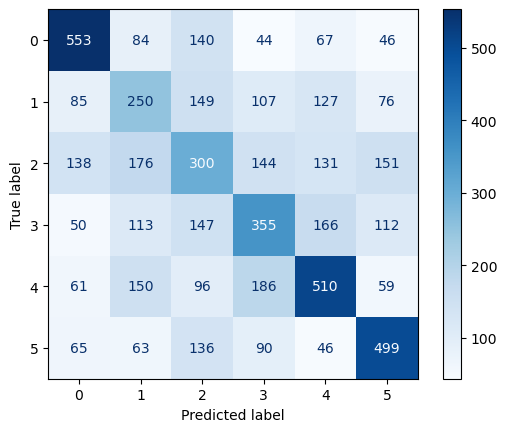

In [12]:
# plot confusion matrix

plot_confusion_matrix(clf_tree, X_test, y_test_dt, cmap = plt.cm.Blues);

In [13]:
print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       934
           1       0.30      0.31      0.31       794
           2       0.31      0.29      0.30      1040
           3       0.38      0.38      0.38       943
           4       0.49      0.48      0.48      1062
           5       0.53      0.56      0.54       899

    accuracy                           0.43      5672
   macro avg       0.43      0.43      0.43      5672
weighted avg       0.43      0.43      0.43      5672



In [14]:
feat_importances = pd.Series(clf_tree.feature_importances_,
                            index = X_train.columns)

feat_importances

track_popularity    0.073780
danceability        0.107804
energy              0.085860
key                 0.032558
loudness            0.076098
mode                0.010556
speechiness         0.116941
acousticness        0.076758
instrumentalness    0.071443
liveness            0.052537
valence             0.081127
tempo               0.131397
duration_ms         0.083142
dtype: float64

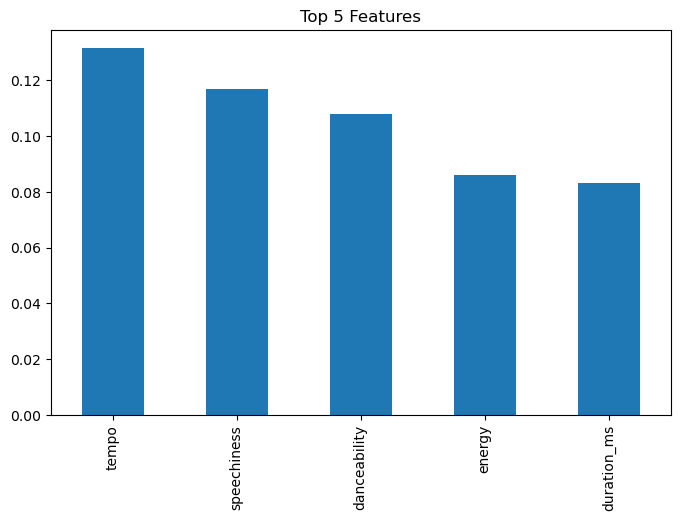

In [15]:
feature_importance_plot(clf_tree, X_train, n=5)

# Decision Tree 1.2

In [16]:
songs_data_Top10 = list[songs_data["genre"], songs_data["tempo"], songs_data["speechiness"], songs_data["danceability"], songs_data["energy"], songs_data["valence"]]

In [17]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [18]:
X_train, X_test, y_train_dt, y_test_dt = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [19]:
clf_tree = DecisionTreeClassifier()
clf_tree

DecisionTreeClassifier()

In [20]:
clf_tree.fit(X_train, y_train_dt)

DecisionTreeClassifier()

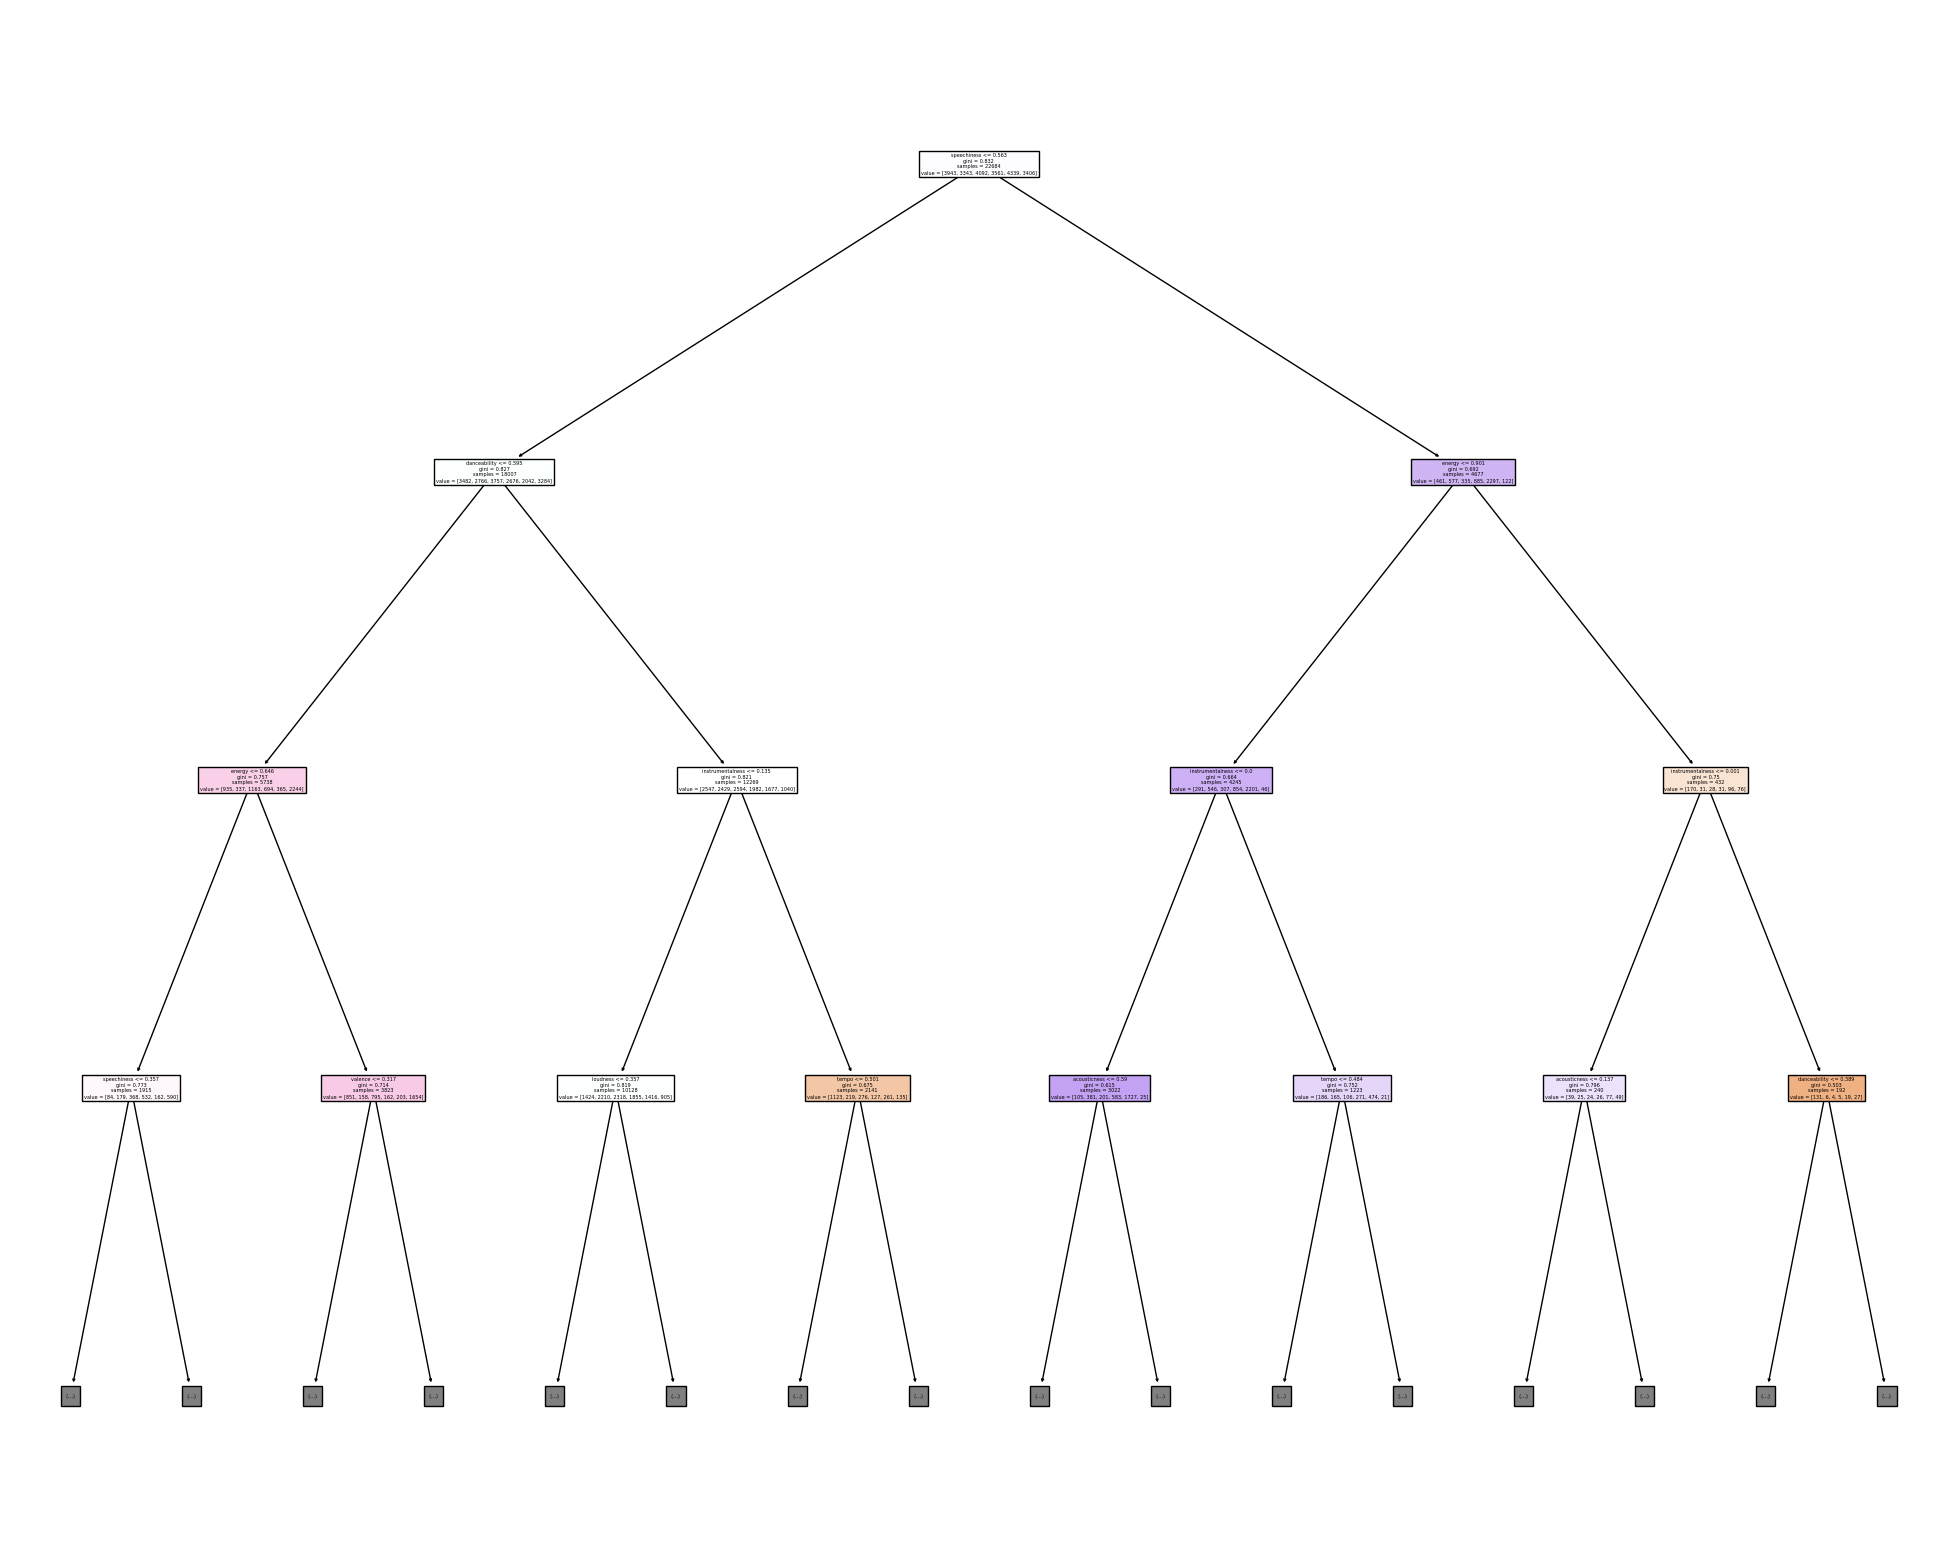

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   max_depth = 3,
                   filled = True)

In [22]:
y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([4, 5, 4, ..., 4, 4, 2])

In [23]:
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test_dt[0:5]))

first five predicted values: [4 5 4 3 4]
first five actual values: [3, 5, 1, 3, 3]


C:\Users\anaga\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


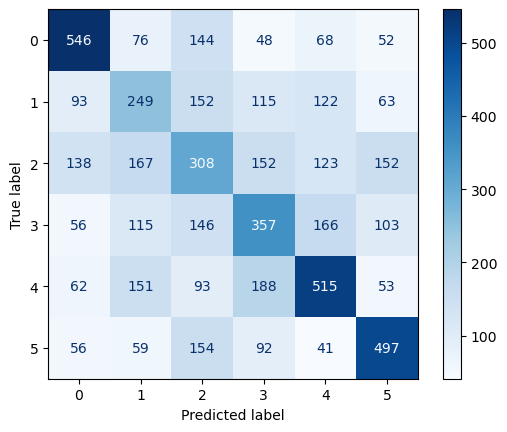

In [24]:
# plot confusion matrix

plot_confusion_matrix(clf_tree, X_test, y_test_dt, cmap = plt.cm.Blues);

In [25]:
print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       934
           1       0.30      0.31      0.31       794
           2       0.31      0.30      0.30      1040
           3       0.38      0.38      0.38       943
           4       0.50      0.48      0.49      1062
           5       0.54      0.55      0.55       899

    accuracy                           0.44      5672
   macro avg       0.43      0.44      0.43      5672
weighted avg       0.43      0.44      0.44      5672



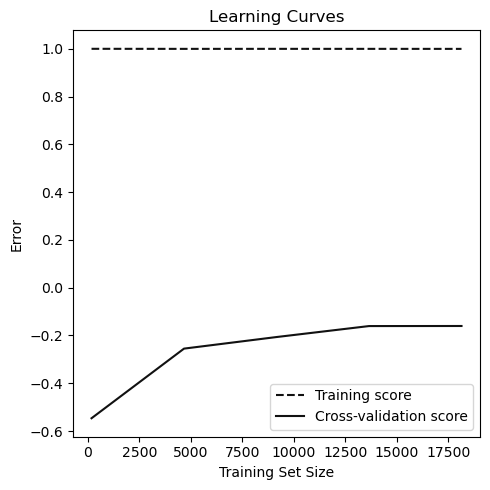

In [26]:
learning_curve_plot(clf_tree, X_train, y_train_dt, scoring = 'r2')